In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [2]:
d200 = {}
with open("200k_01", "rb") as f:
    d200 = pickle.load(f)
d200.keys()
fstar_lin = d200['lin'].history['fstar']
fstar_poly = d200['poly'].history['fstar']
fstar_rbf = d200['rbf'].history['fstar']
del d200

In [3]:
def plot_row(row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar, fig, axs, plot_mode):
    cup_model, cup_model1, cup_model2 = cup_model_0, cup_model_1, cup_model_2
    column = 0

    colors = ['blue', 'red', 'green']
    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.3', color=colors[0])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.5', color=colors[1])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.7', color=colors[2])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['0.3', '0.5', '0.7'])
    axs[row][column].set_title('eps: 1e-1')
    if plot_mode == 0:
        axs[row][column].set_ylim(0,1.1)


    #----------------------------------------------------------------------#

    cup_model, cup_model1, cup_model2 = cup_model_3, cup_model_4, cup_model_5
    column = 1

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.3', color=colors[0])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.5', color=colors[1])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.7', color=colors[2])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['0.3', '0.5', '0.7'])
    axs[row][column].set_title('eps: 1e-2')
    if plot_mode == 0:
        axs[row][column].set_ylim(0,1.1)

    #----------------------------------------------------------------------#

    cup_model, cup_model1, cup_model2 = cup_model_6, cup_model_7, cup_model_8
    column = 2

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.3', color=colors[0])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.5', color=colors[1])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    if plot_mode == 0:
        axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
        axs[row][column].set_ylabel("CONV_RATE")
    else:
        axs[row][column].plot(range(len(log_residual_error)), log_residual_error, label='0.7', color=colors[2])
        axs[row][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['0.3', '0.5', '0.7'])
    axs[row][column].set_title('eps: 5e-3')
    if plot_mode == 0:
        axs[row][column].set_ylim(0,1.1)

In [4]:
d20_1 = {}
d20_2 = {}
d20_3 = {}
with open("20k_01", "rb") as f:
    d20_1 = pickle.load(f)
with open("20k_02", "rb") as f:
    d20_2 = pickle.load(f)
with open("20k_03", "rb") as f:
    d20_3 = pickle.load(f)

No handles with labels found to put in legend.


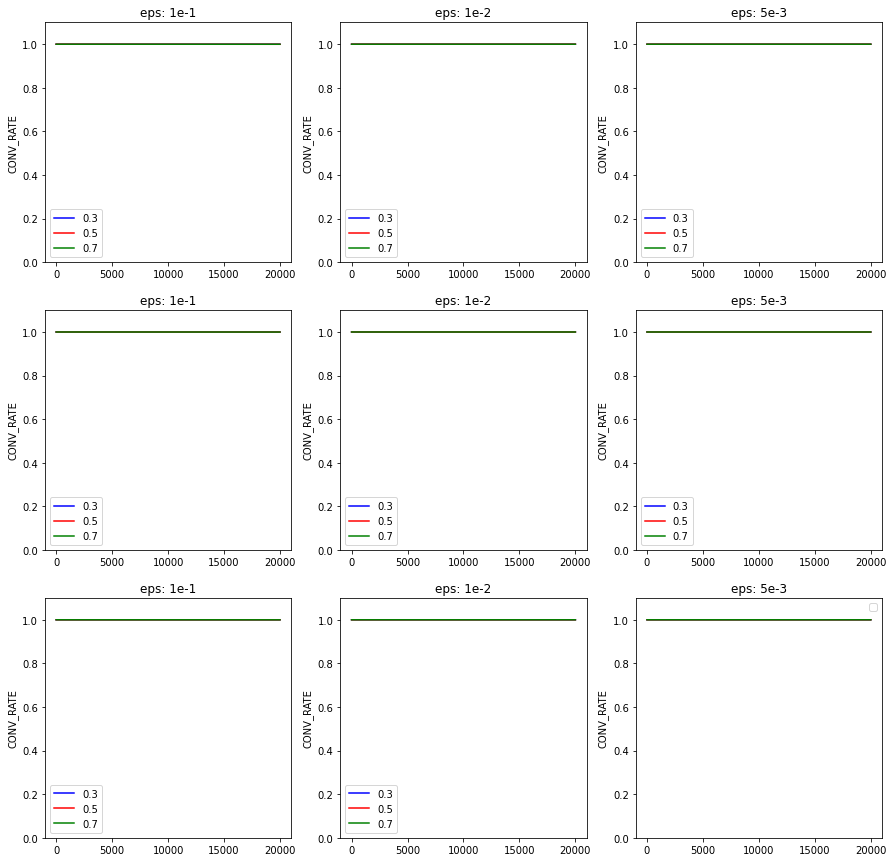

In [5]:
fig, axs = plt.subplots(3,3, figsize=(15,15))

# 0 - conv_rate only, 1 - log_res_error only
plot_mode = 0
update_row = 1 if plot_mode in (0,1) else 2 # if we want to reimplement the plots with both conv_rate and log_res_error
curr_row = 0
 
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["lin1"], d20_1["lin2"], d20_1["lin3"], d20_2["lin1"], d20_2["lin2"], d20_2["lin3"], d20_3["lin1"], d20_3["lin2"], d20_3["lin3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_lin, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["poly1"], d20_1["poly2"], d20_1["poly3"], d20_2["poly1"], d20_2["poly2"], d20_2["poly3"], d20_3["poly1"], d20_3["poly2"], d20_3["poly3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_poly, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["rbf1"], d20_1["rbf2"], d20_1["rbf3"], d20_2["rbf1"], d20_2["rbf2"], d20_2["rbf3"], d20_3["rbf1"], d20_3["rbf2"], d20_3["rbf3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_rbf, fig, axs, plot_mode)

plt.legend()
plt.show()

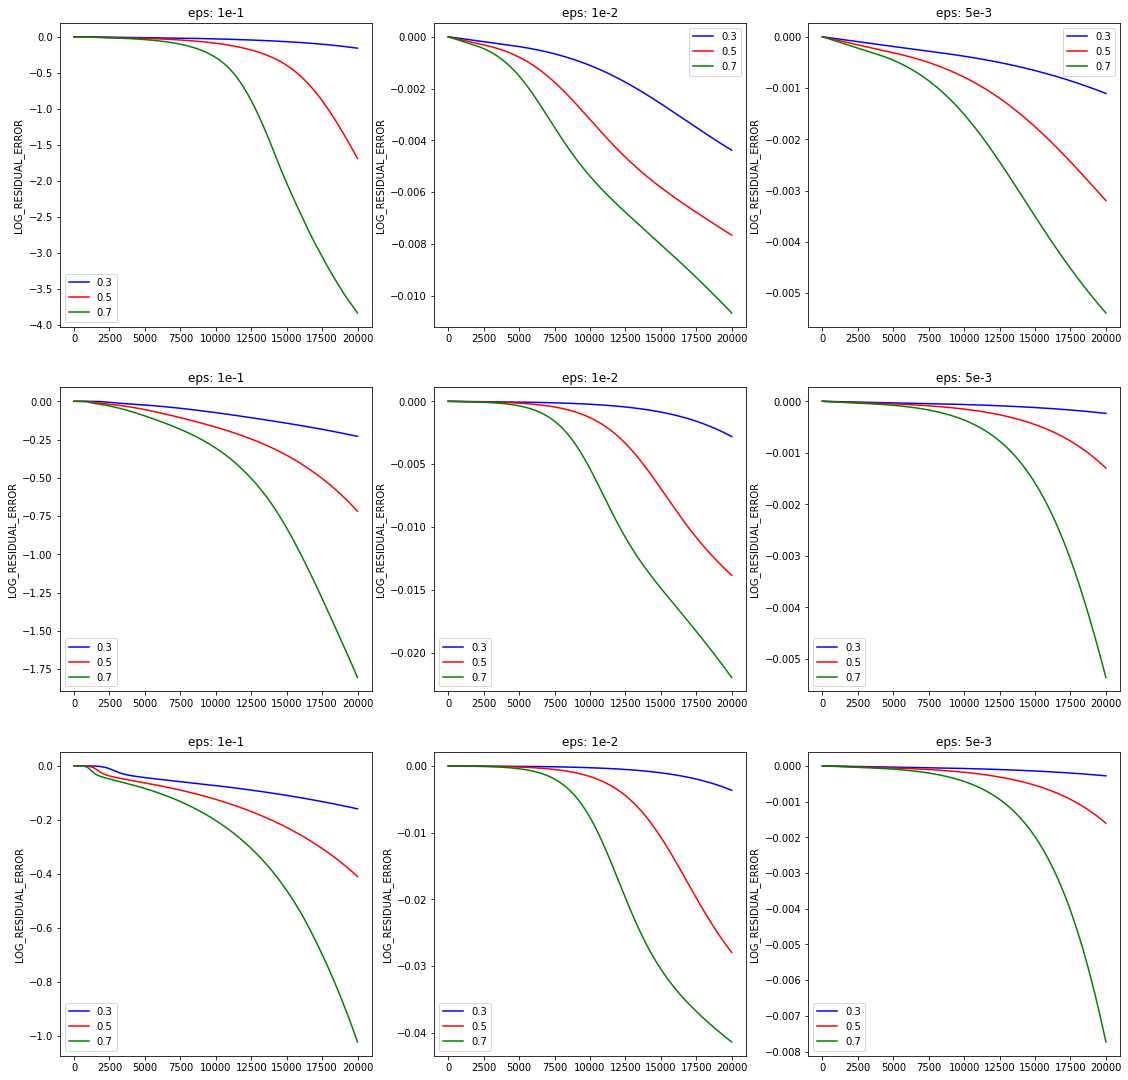

In [6]:
fig, axs = plt.subplots(3,3, figsize=(19,19))

# 0 - conv_rate only, 1 - log_res_error only
plot_mode = 1
update_row = 1 if plot_mode in (0,1) else 2 # if we want to reimplement the plots with both conv_rate and log_res_error
curr_row = 0
 
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["lin1"], d20_1["lin2"], d20_1["lin3"], d20_2["lin1"], d20_2["lin2"], d20_2["lin3"], d20_3["lin1"], d20_3["lin2"], d20_3["lin3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_lin, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["poly1"], d20_1["poly2"], d20_1["poly3"], d20_2["poly1"], d20_2["poly2"], d20_2["poly3"], d20_3["poly1"], d20_3["poly2"], d20_3["poly3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_poly, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["rbf1"], d20_1["rbf2"], d20_1["rbf3"], d20_2["rbf1"], d20_2["rbf2"], d20_2["rbf3"], d20_3["rbf1"], d20_3["rbf2"], d20_3["rbf3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_rbf, fig, axs, plot_mode)

plt.legend()
plt.show()

In [7]:
del d20_1, d20_2, d20_3

In [8]:
d20_1 = {}
d20_2 = {}
d20_3 = {}
with open("50k_01", "rb") as f:
    d20_1 = pickle.load(f)
with open("50k_02", "rb") as f:
    d20_2 = pickle.load(f)
with open("50k_03", "rb") as f:
    d20_3 = pickle.load(f)

No handles with labels found to put in legend.


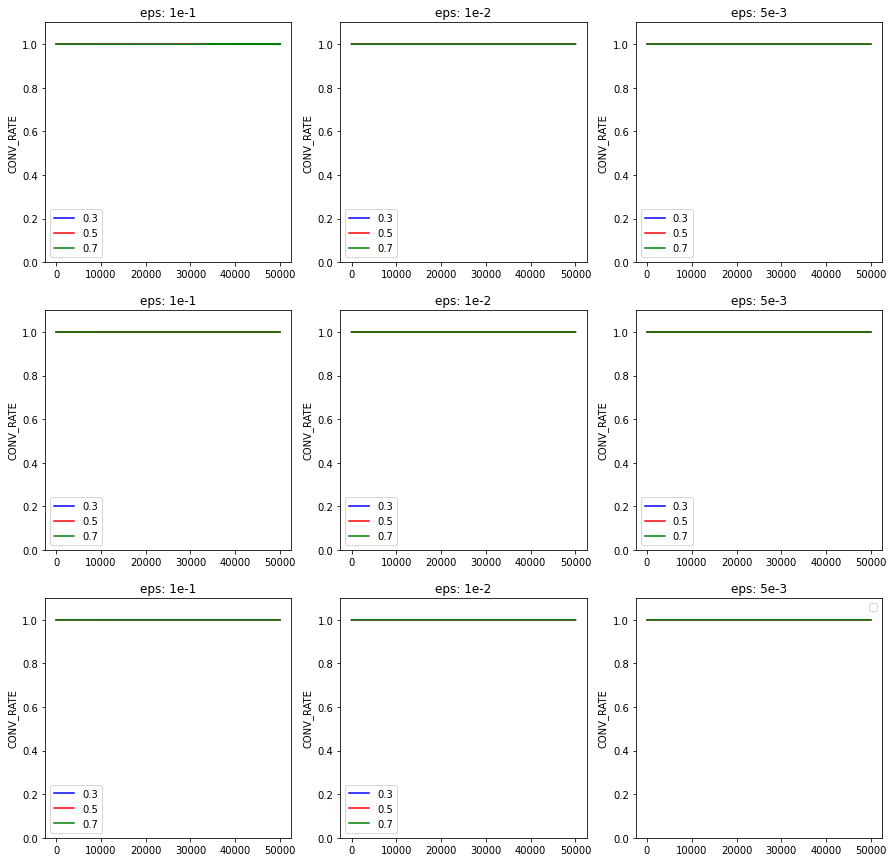

In [9]:
fig, axs = plt.subplots(3,3, figsize=(15,15))

# 0 - conv_rate only, 1 - log_res_error only
plot_mode = 0
update_row = 1 if plot_mode in (0,1) else 2 # if we want to reimplement the plots with both conv_rate and log_res_error
curr_row = 0
 
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["lin1"], d20_1["lin2"], d20_1["lin3"], d20_2["lin1"], d20_2["lin2"], d20_2["lin3"], d20_3["lin1"], d20_3["lin2"], d20_3["lin3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_lin, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["poly1"], d20_1["poly2"], d20_1["poly3"], d20_2["poly1"], d20_2["poly2"], d20_2["poly3"], d20_3["poly1"], d20_3["poly2"], d20_3["poly3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_poly, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["rbf1"], d20_1["rbf2"], d20_1["rbf3"], d20_2["rbf1"], d20_2["rbf2"], d20_2["rbf3"], d20_3["rbf1"], d20_3["rbf2"], d20_3["rbf3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_rbf, fig, axs, plot_mode)

plt.legend()
plt.show()

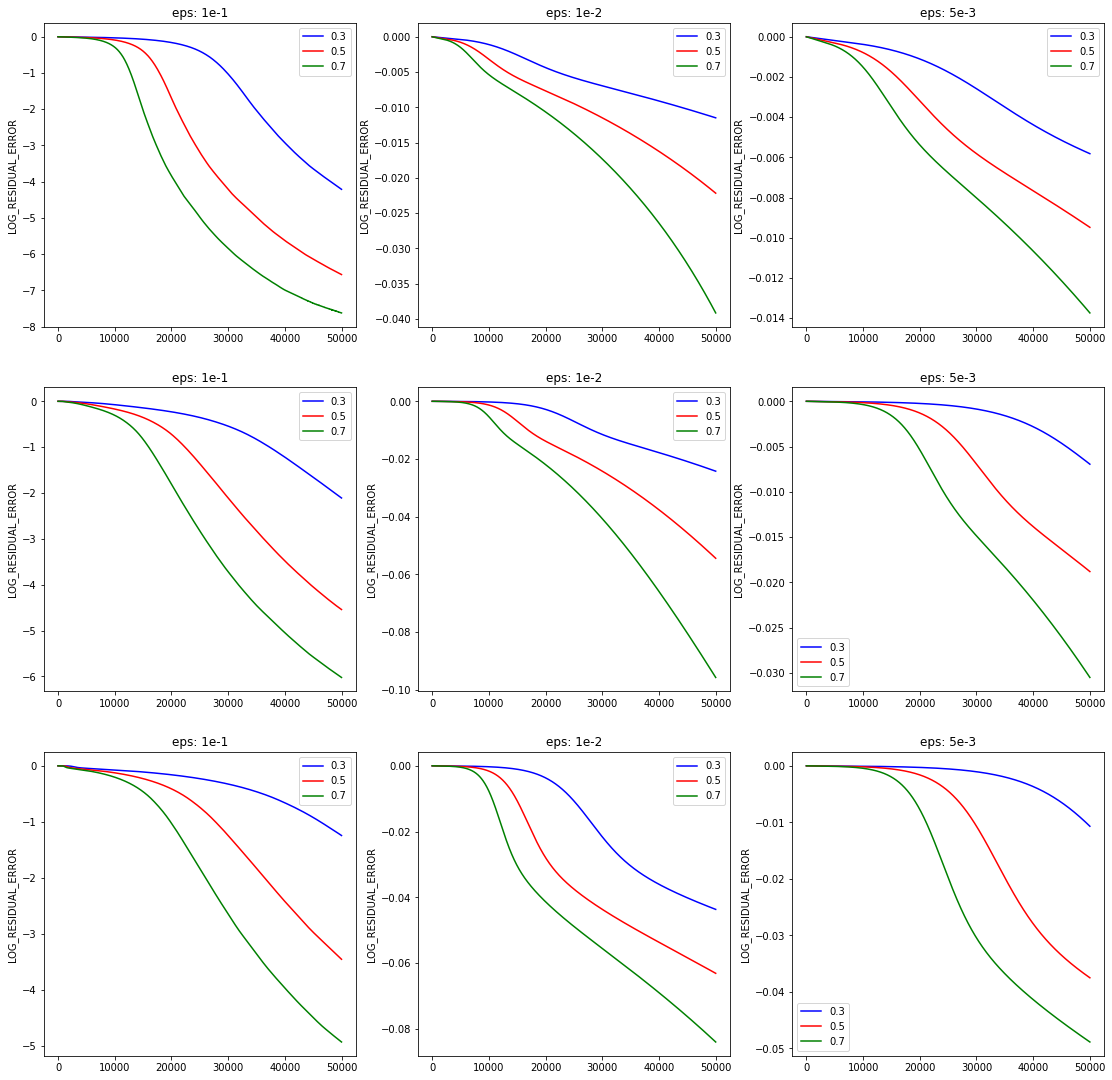

In [10]:
fig, axs = plt.subplots(3,3, figsize=(19,19))

# 0 - conv_rate only, 1 - log_res_error only
plot_mode = 1
update_row = 1 if plot_mode in (0,1) else 2 # if we want to reimplement the plots with both conv_rate and log_res_error
curr_row = 0
 
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["lin1"], d20_1["lin2"], d20_1["lin3"], d20_2["lin1"], d20_2["lin2"], d20_2["lin3"], d20_3["lin1"], d20_3["lin2"], d20_3["lin3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_lin, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["poly1"], d20_1["poly2"], d20_1["poly3"], d20_2["poly1"], d20_2["poly2"], d20_2["poly3"], d20_3["poly1"], d20_3["poly2"], d20_3["poly3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_poly, fig, axs, plot_mode)

curr_row += update_row
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d20_1["rbf1"], d20_1["rbf2"], d20_1["rbf3"], d20_2["rbf1"], d20_2["rbf2"], d20_2["rbf3"], d20_3["rbf1"], d20_3["rbf2"], d20_3["rbf3"]
plot_row(curr_row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, fstar_rbf, fig, axs, plot_mode)

plt.legend()
plt.show()